<a href="https://colab.research.google.com/github/kn201dvv/DataAnalys/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22lab6_density_ua_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Лабораторная 4: восстановление плотности распределения

Данными в этом задании являются измерения некоторых проверочных параметров на конвейерах  сборки оборудования Bosh (см. [конкурс](https://www.kaggle.com/c/bosch-production-line-performance) «Bosch Production Line Performance» на Kaggle). 

Все исходные данные Bosh не помещаются в оперативную память компьютера, поэтому в файле `data.csv` — лишь некоторые признаки. Прочтите данные из файла `data.csv`. Целевым признаком здесь является `Response` — наличие брака в оборудовании. 

In [ ]:
import pandas as pd

In [4]:
# место для кода
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()
data = pd.read_csv('data6.csv')

Saving data6.csv to data6 (1).csv


## 1 
Постройте на одном графике два приближения к плотности распределения признака `L1_S24_F1846` для `Response = 0` и для `Response = 1`, используя одно из следующих ядер (номер ядра выберите по формуле: `(n mod 6) + 1`, где `n` — ваш номер в списке группы):

    1.	кусочно-постоянное (прямоугольное) -  tophat
    2.	гауссовское -  gaussian
    3.	линейное (треугольник) -  linear
    4.	косинусоидальное -  cosine
    5.	квадратичное (Епанечникова) -  epanechnikov
    6.	экспоненциальное -  exponential


кусочно-постоянное (прямоугольное) -  tophat

In [14]:
from sklearn.neighbors import KernelDensity
import numpy as np

import matplotlib.pyplot as plt

*Help:*

    i0 = data['Response'] == 0
    kde0 = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(data.loc[i0, 'L1_S24_F1846'].values.reshape(-1, 1))
    X_plot = np.linspace(-1, 1, 1000).reshape(-1, 1)
    Dens0 = np.exp(kde0.score_samples(X_plot))  # score_samples возвращает логарифм плотности

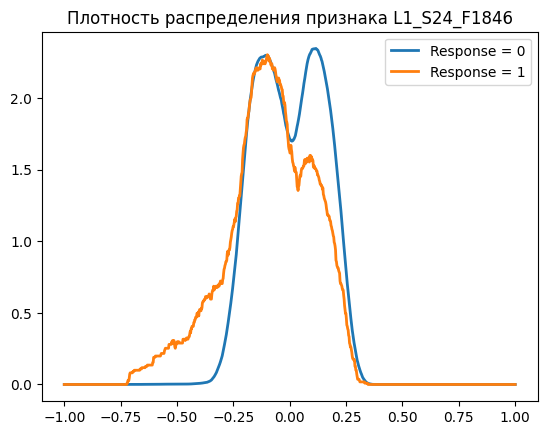

In [15]:
# место для кода
i0 = data['Response'] == 0
kde0 = KernelDensity(kernel='tophat', bandwidth=0.1).fit(data.loc[i0, 'L1_S24_F1846'].values.reshape(-1, 1))

i1 = data['Response'] == 1
kde1 = KernelDensity(kernel='tophat', bandwidth=0.1).fit(data.loc[i1, 'L1_S24_F1846'].values.reshape(-1, 1))

X_plot = np.linspace(-1, 1, 1000).reshape(-1, 1)

Dens0 = np.exp(kde0.score_samples(X_plot))
plt.plot(X_plot[:, 0], Dens0, label='Response = 0', linewidth=2)

Dens1 = np.exp(kde1.score_samples(X_plot))
plt.plot(X_plot[:, 0], Dens1, label='Response = 1', linewidth=2)

plt.legend()
plt.title('Плотность распределения признака L1_S24_F1846')
plt.show()

Ответьте в комментариях на вопрос: является ли выборка хорошо разделимой по признаку  `L1_S24_F1846`?

Графіки мають частково схожу форму та перетинаються, що означає - розділення на класи на основі цієї ознаки може бути складним або неефективним.

## 2

Разбейте выборку `data` на две равные части: тренировочную `dataTrain` и проверочную `dataTest`. 

In [7]:
dataTrain = data.loc[0:data.shape[0] / 2, ].reset_index(drop=True)
dataTest = data.loc[data.shape[0] / 2:data.shape[0], ].reset_index(drop=True)

Пользуясь кросс-валидацией, подберите **для каждого класса `Response` (`r=0` и `r=1`)** значение ширины ядра `bandwidth`, при котором логарифм правдоподобия максимален на проверочной выборке.

*Help:*

    r = 0
    kde0 = KernelDensity(kernel='gaussian', bandwidth=0.05)
    kde0.fit(dataTrain.loc[dataTrain['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))
    logProbability0 = kde0.score_samples(dataTest.loc[dataTest['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))
    logProbability0[np.isinf(logProbability0)] = -100 # заменяем -бесконечность
    logLikehood0 = logProbability0.sum()
    print(logLikehood0)

In [9]:
# место для кода
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
r = 0
kde0 = KernelDensity(kernel='gaussian', bandwidth=0.05)
kde0.fit(dataTrain.loc[dataTrain['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))
logProbability0 = kde0.score_samples(dataTest.loc[dataTest['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))
logProbability0[np.isinf(logProbability0)] = -100 # заменяем -бесконечность
logLikehood0 = logProbability0.sum()
print(logLikehood0)
r = 1
kde1 = KernelDensity(kernel='gaussian', bandwidth=0.05)
kde1.fit(dataTrain.loc[dataTrain['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))
logProbability1 = kde1.score_samples(dataTest.loc[dataTest['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))
logProbability1[np.isinf(logProbability1)] = -100 # заменяем -бесконечность
logLikehood1 = logProbability1.sum()
print(logLikehood1)

20544.807461121072
103.98787944779144


### 3

Для найденных наилучших `bandwidth` вычислите `p(x|0)` и `p(x|1)` для тестовой выборки. 

In [10]:
predictionProbXafter0 = np.exp(kde0.score_samples(dataTest['L1_S24_F1846'].values.reshape(-1, 1)))
predictionProbXafter1 = np.exp(kde1.score_samples(dataTest['L1_S24_F1846'].values.reshape(-1, 1)))

По формуле Байеса найдите затем `p(0|x)` и `p(1|x)`. Отсортируйте все объекты тестовой выборки по возрастанию предсказанной вероятности `p(1|x)`, выведите на экран вероятности для последних 10 объектов и рассчитайте количество бракованных деталей среди последних 100 объектов в отсортированном ряду.

*Help:*
    
    ind = np.argsort(predictionProb1afterX) - сортировка, возвращающая индексы элементов
    print(predictionProb1afterX[ind[-10:]]) - вывод последних 10 элементов
    print(sum(dataTest.loc[ind[-100:],'Response'])) - количество бракованных среди 100 с максимальной вероятностью брака

In [11]:
# место для кода
# вычисляем p(0|x) и p(1|x) по формуле Байеса
# p(0|x) = p(x|0)*p(0) / [p(x|0)*p(0) + p(x|1)*p(1)]
# где p(x|0) и p(x|1) - плотности распределения признака, p(0) и p(1) - априорные вероятности классов.
p0afterX = predictionProbXafter0/(predictionProbXafter0 + predictionProbXafter1)
p1afterX = predictionProbXafter1/(predictionProbXafter0 + predictionProbXafter1)

# сортируем объекты тестовой выборки по возрастанию вероятности p(1|x)
ind = np.argsort(p1afterX)

# выводим вероятности для последних 10 объектов
print(p1afterX[ind[-10:]])

# вычисляем количество бракованных деталей среди последних 100 объектов в отсортированном ряду
print(sum(dataTest.loc[ind[-100:], 'Response']))

[0.99137411 0.99182216 0.99182216 0.9919103  0.99195385 0.99195385
 0.99216571 0.99216571 0.99244186 0.99245004]
29
